In [1]:
import os
import numpy as np
import cv2
import pandas as pd
from tqdm import tqdm
from skimage.feature import hog
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from skimage import data, exposure
from skimage.transform import resize
from skimage import feature
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import  Dense, Dropout
from keras.models import Sequential
import torch
import torch.nn.functional as F
import tensorflow as tf
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

Exporter image

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1kZ7otM2soOwyg0vfjmeHM-AYM_z2qq9m&export=download;

Downloading...
From: https://drive.google.com/u/0/uc?id=1kZ7otM2soOwyg0vfjmeHM-AYM_z2qq9m
To: /content/imageOriginal.pkl
100% 155M/155M [00:05<00:00, 26.7MB/s]


Exportation image hog

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1_OdPju_CRTsObIPWG3VmywIMr2No-rEd&export=download;

Downloading...
From: https://drive.google.com/u/0/uc?id=1_OdPju_CRTsObIPWG3VmywIMr2No-rEd
To: /content/imageHog.pkl
100% 1.51G/1.51G [00:20<00:00, 72.4MB/s]


Exportation labels

In [ ]:
!gdown https://drive.google.com/u/0/uc?id=1Vhh3Md7s265H7ujmN36ORFn-Z8wO1in5&export=download;

Downloading...
From: https://drive.google.com/u/0/uc?id=1Vhh3Md7s265H7ujmN36ORFn-Z8wO1in5
To: /content/label.pkl
100% 100k/100k [00:00<00:00, 2.59MB/s]


# Fonction

On a besoin de cette fonction lorsqu'on veut obternir les images original , les vecteurs de caractéristiques de chaque image et le classe de chaque image, en donnant au fonction le chemin de dossier qui contient les images classées et les sauver en binaire

In [2]:
def loadDataByUrl(baseUrl):
  hog_images = []
  labels = []
  original_image=[]
  image_paths = os.listdir(baseUrl)
  for path in image_paths:
    all_images = os.listdir(f"{baseUrl}/{path}")
    for image in tqdm(all_images):
        image_path = f"{baseUrl}/{path}/{image}"
        image = cv2.imread(image_path)
        original_image.append(image)
        image = cv2.resize(image, (64, 128))
        hog_desc = feature.hog(image, orientations=9, pixels_per_cell=(8, 8),cells_per_block=(2, 2), transform_sqrt=True, block_norm='L2-Hys',channel_axis=-1)
        hog_images.append(hog_desc)
        labels.append(path)

  with open('imageOriginal.pkl', 'wb') as file:
    pickle.dump(original_image, file)
  with open('imageHog.pkl', 'wb') as file1:
    pickle.dump(hog_images, file1)
  with open('label.pkl', 'wb') as file3:
    pickle.dump(labels, file3)
  return [original_image,hog_images,labels]

Et cette fonction  va nous servir a charger les  etiquettes de chaque image , et les images original et ses caracteriqtiques

In [3]:
def loadDataPickle():
  hog_images = []
  labels = []
  original_image=[]
  with open('imageOriginal.pkl', 'rb') as file:
    original_image=pickle.load(file)
  with open('imageHog.pkl', 'rb') as file1:
    hog_images=pickle.load(file1)
  with open('label.pkl', 'rb') as file3:
    labels=pickle.load(file3)
  return [original_image,hog_images,labels]

**Classification d'images Cifar-10**

L'ensemble de données CIFAR-10 se compose de 60 000 images couleur 32 x 32 réparties en 10 classes, avec 6 000 images par classe. Il existe 50 000 images de formation et 10 000 images de test.
Définition du problème:
Étant donné une image, pouvons-nous prédire la classe correcte de cette image ?

Les images sont très petites (32x32) et en les visualisant vous remarquerez combien il est difficile de les distinguer même pour un humain.
10 classes
1.  Avion
2.  Voiture
3. Oiseau
4. Chat
5. Cerf
6. Chien
7. Grenouille
8. Cheval
9. Bateau
10. Camion

# EXPLORATION DE DONNEE

In [218]:
BaseUrl = '/content/cifar10/train/'

La fonction loadDataPickle est conçue pour charger des données à partir de trois fichiers pickle : 'imageOriginal.pkl', 'imageHog.pkl' et 'label.pkl'. Les données chargées comprennent les images originales, les images HOG (Histogramme des gradients orientés) et les étiquettes correspondantes

In [4]:
[originalImage,hog_descriptor,target]=loadDataPickle()

In [ ]:
print(f"Features shape: {np.array(originalImage).shape}")
print(f"target shape: {np.array(target).shape}")

Features shape: (50000, 32, 32, 3)
target shape: (50000,)


In [5]:
labels = np.unique(target).tolist()
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

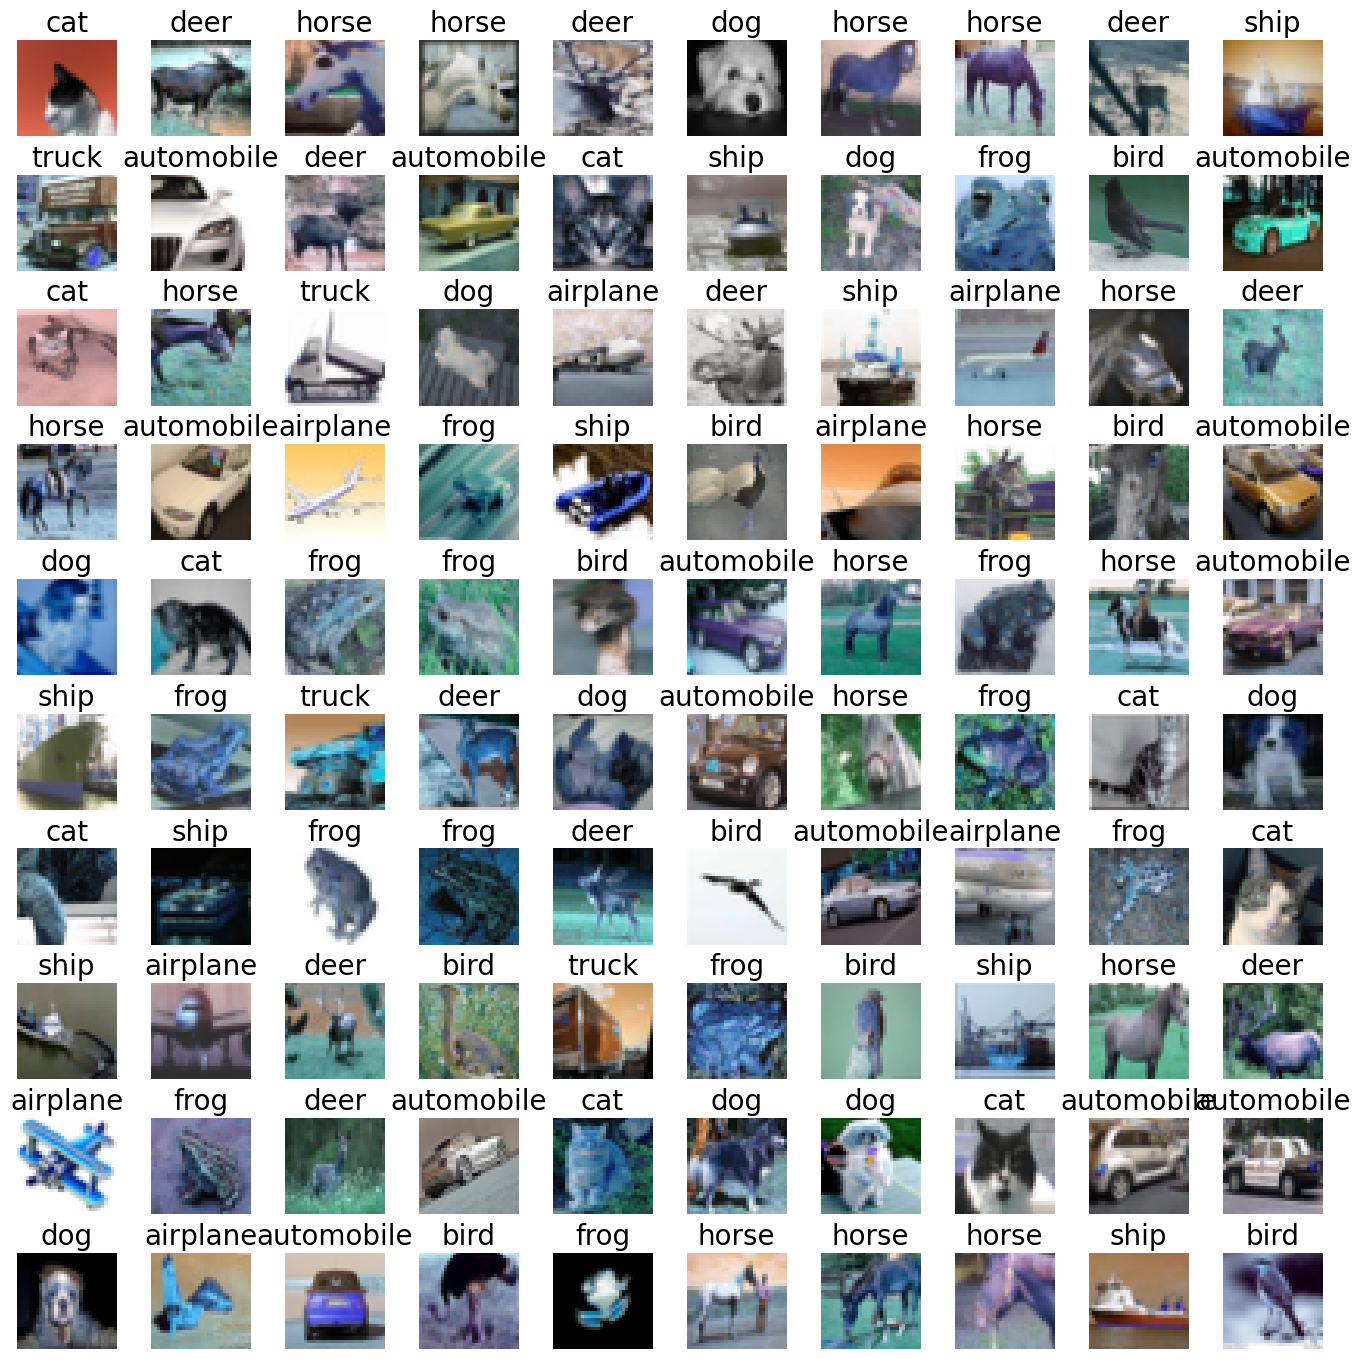

In [ ]:
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel()

n_train = len(originalImage)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(np.array(originalImage)[index,1:])
    axes[i].set_title(labels[labels.index(target[index])], fontsize = 20)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Les images sont bien reparti par classes

Text(0.5, 1.0, 'Class distribution')

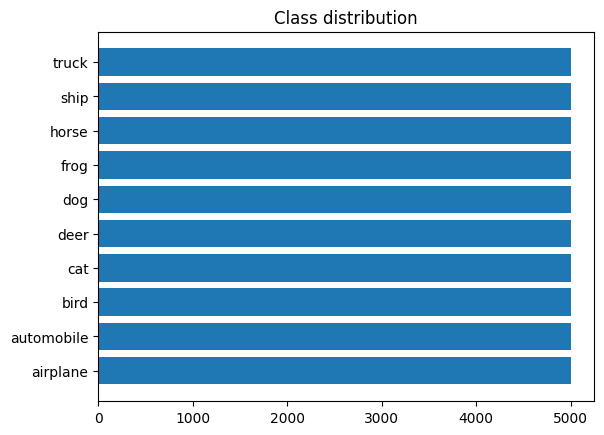

In [ ]:
classes, counts = np.unique(target, return_counts=True)
plt.barh(labels, counts)
plt.title('Class distribution')

# Preprocessing

In [ ]:
scaler = StandardScaler()
hog_descriptor=scaler.fit_transform(hog_descriptor)

In [293]:
label_encoder = LabelEncoder()

# Fit and transform the labels to numerical values
numerical_labels = label_encoder.fit_transform(target)

In [ ]:
X_train_hog, X_test_hog, y_train_hog, y_test_hog = train_test_split(hog_descriptor, numerical_labels, test_size=0.3, random_state=42)

In [17]:
kf=KFold(n_splits=2,shuffle=True,random_state=42)

# HOG ALGORITHME

## Model

### softmax classifer

In [ ]:
param_grid = {
    'C': [0.001,0.1],
    'solver': ['sag','saga','lbfgs'],
}
# Create a Logistic Regression model
logreg = LogisticRegression(verbose=4,multi_class='multinomial',penalty='l2',max_iter=800)
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=2)
grid_search.fit(X_train_hog, y_train_hog)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("best parametre",best_params)
# Fit the model with the best hyperparameters
y_pred_log = grid_search.predict(X_test_hog)
accuracy_log = accuracy_score(y_test_hog, y_pred_log)
print(f'Précision sur l\'ensemble de test: {accuracy_log}')

convergence after 46 epochs took 179 seconds
convergence after 56 epochs took 211 seconds
convergence after 107 epochs took 522 seconds
convergence after 130 epochs took 629 seconds
convergence after 462 epochs took 1718 seconds
convergence after 459 epochs took 1707 seconds
convergence after 767 epochs took 3604 seconds
convergence after 765 epochs took 3725 seconds
convergence after 33 epochs took 249 seconds
best parametre {'C': 0.001, 'solver': 'sag'}
Précision sur l'ensemble de test: 0.5639333333333333


### svm classifer

In [ ]:
space_svc = {
              'kernel': ['rbf','sigmoid']
            }
model_svc = SVC(gamma='scale')
svc=GridSearchCV(model_svc, param_grid=space_svc, cv=kf, verbose=4,)
svc.fit(X_train_hog, y_train_hog)
print(f'The best parameter is {svc.best_params_}')

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END ........................kernel=rbf;, score=0.598 total time=39.9min
[CV 2/2] END ........................kernel=rbf;, score=0.600 total time=38.0min
[CV 1/2] END ....................kernel=sigmoid;, score=0.536 total time=24.4min
[CV 2/2] END ....................kernel=sigmoid;, score=0.535 total time=24.4min
The best parameter is {'kernel': 'rbf'}


Le tunning des hyperparametre prend du temps, ça dure 4h pour le  fit seulement , mais au final j'ai trouvé qu'en utilisant le kernel "rbf" la precision de model vaut 60% environ

In [ ]:
svc = SVC(gamma='scale',kernel='rbf')
svc.fit(X_train_hog, y_train_hog)
y_pred_svc = svc.predict(X_test_hog)
accuracy_svc = accuracy_score(y_test_hog, y_pred_svc)
print(f'Précision sur l\'ensemble de test: {accuracy_svc}')

Précision sur l'ensemble de test: 0.6298666666666667


# SIFT ALGORITHM

In [6]:
def siftImage(images,labels,sift):
  all_descriptor=[]
  newLabels=[]
  for id,image in tqdm(enumerate(images)):
    descriptors_null = np.zeros((35,128))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    black_image = np.zeros((32, 32), dtype=np.uint8)
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    img_with_keypoints = cv2.drawKeypoints(black_image, keypoints, None)
    img_with_keypoints = cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2GRAY)
    all_descriptor.append(img_with_keypoints.flatten())
    newLabels.append(labels[id])
  return all_descriptor,newLabels

In [7]:
sift = cv2.xfeatures2d.SIFT_create()

In [8]:
X,Y=siftImage(originalImage,target,sift)

50000it [01:47, 466.80it/s]


Apres avoir recuperer les descriptors de chaque image on constate qu'il y des image qui n'a pas de descriptor, et on les supprime

In [9]:
print(f"on a {len(X)} images maintenant")

on a 50000 images maintenant


## PRE-PROCESSING

Premierement ,on va normaliser le donner , sous l'echèlle de 0-1 puis on les standarise

In [10]:
X = np.array(X)/255

In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [12]:
label_encoder = LabelEncoder()
numeric_encoder_sift= label_encoder.fit_transform(Y)

In [13]:
X_train_sift,X_test_sift,y_train_sift,y_test_sift = train_test_split(X,numeric_encoder_sift,test_size=0.3,random_state=42)
print(f"donnée d'entrainement : {X_train_sift.shape} , donner de test : {X_test_sift.shape}")

donnée d'entrainement : (35000, 1024) , donner de test : (15000, 1024)


## MODEL

###  SOFTMAX CLASSIFER

In [14]:
param_grid = {
    'C': [0.001,0.1],
    'solver': ['sag','saga'],
}
# Create a Logistic Regression model
logreg_sift = LogisticRegression(multi_class='multinomial',penalty='l2',max_iter=200)
# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg_sift, param_grid, cv=2,verbose=4)
grid_search.fit(X_train_sift, y_train_sift)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("best parametre",best_params)
# Fit the model with the best hyperparameters
y_pred_sift = grid_search.predict(X_test_sift)


Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ...............C=0.001, solver=sag;, score=0.188 total time=  24.4s
[CV 2/2] END ...............C=0.001, solver=sag;, score=0.191 total time=  23.2s
[CV 1/2] END ..............C=0.001, solver=saga;, score=0.188 total time=  33.3s
[CV 2/2] END ..............C=0.001, solver=saga;, score=0.191 total time=  32.9s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END .................C=0.1, solver=sag;, score=0.166 total time= 3.5min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END .................C=0.1, solver=sag;, score=0.165 total time= 3.5min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/2] END ................C=0.1, solver=saga;, score=0.165 total time= 4.4min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/2] END ................C=0.1, solver=saga;, score=0.165 total time= 4.4min
best parametre {'C': 0.001, 'solver': 'saga'}


NameError: ignored

In [15]:
accuracy_sift = accuracy_score(y_test_sift, y_pred_sift)
print(f'Précision sur l\'ensemble de test: {accuracy_sift}')

Précision sur l'ensemble de test: 0.19173333333333334


### SVM

In [ ]:
space_svc = {
              'kernel': ['rbf','sigmoid']
            }
model_svc = SVC(gamma='scale')
svc=GridSearchCV(model_svc, param_grid=space_svc, cv=kf, verbose=4,)
svc.fit(X_train_sift, y_train_sift)
print(f'The best parameter is {svc.best_params_}')

Fitting 2 folds for each of 2 candidates, totalling 4 fits


# DEEPLEARNING

## Pre-processing

In [221]:
originalImageGray = [cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in originalImage ]

In [222]:
originalImageGray = np.array(originalImageGray)/255

In [119]:
labels = np.unique(target).tolist()
IMAGE_WIDTH=originalImage[0].shape[0]
IMAGE_HEIGHT=originalImage[0].shape[1]
IMAGE_PIXELS=IMAGE_HEIGHT*IMAGE_WIDTH
TOTAL_INPUTS= IMAGE_PIXELS
NR_CLASSES=len(labels)

In [223]:
numerical_labels=np.array(numerical_labels).reshape(np.array(numerical_labels).shape[0],1)
originalImageGray=originalImageGray.reshape(originalImageGray.shape[0], TOTAL_INPUTS)

In [224]:
X_train_deep, X_val_deep, y_train_deep, y_val_deep = train_test_split(originalImageGray, numerical_labels, test_size=0.3, random_state=42)

In [225]:
print(f"on a {X_train_deep.shape} maintenant")

on a (35000, 1024) maintenant


## MODEL

### KERAS

In [226]:
opt = tf.keras.optimizers.SGD(0.01, momentum=0.9)

In [227]:
model_1 = Sequential([
    Dense(units=512, input_dim=TOTAL_INPUTS, activation='relu', name = 'm1_hidden1'),
    Dense(units=128, activation='relu', name = 'm1_hidden2'),
    Dense(units=10, activation='softmax', name = 'm1_output')
])
model_1.compile(optimizer=opt, loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [228]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 512)               524800    
                                                                 
 m1_hidden2 (Dense)          (None, 128)               65664     
                                                                 
 m1_output (Dense)           (None, 10)                1290      
                                                                 
Total params: 591754 (2.26 MB)
Trainable params: 591754 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [229]:
num_epochs=10
batch_size=64

history = model_1.fit(x=X_train_deep, y=y_train_deep, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val_deep, y_val_deep))

Epoch 1/10
547/547 [==============================] - 8s 14ms/step - loss: 2.0378 - accuracy: 0.2630 - val_loss: 1.9246 - val_accuracy: 0.3129
Epoch 2/10
547/547 [==============================] - 6s 12ms/step - loss: 1.8723 - accuracy: 0.3342 - val_loss: 1.8508 - val_accuracy: 0.3461
Epoch 3/10
547/547 [==============================] - 7s 13ms/step - loss: 1.8109 - accuracy: 0.3554 - val_loss: 1.8435 - val_accuracy: 0.3394
Epoch 4/10
547/547 [==============================] - 6s 10ms/step - loss: 1.7646 - accuracy: 0.3719 - val_loss: 1.7930 - val_accuracy: 0.3616
Epoch 5/10
547/547 [==============================] - 7s 12ms/step - loss: 1.7272 - accuracy: 0.3855 - val_loss: 1.7722 - val_accuracy: 0.3719
Epoch 6/10
547/547 [==============================] - 6s 11ms/step - loss: 1.6884 - accuracy: 0.3992 - val_loss: 1.7220 - val_accuracy: 0.3911
Epoch 7/10
547/547 [==============================] - 8s 14ms/step - loss: 1.6613 - accuracy: 0.4075 - val_loss: 1.6951 - val_accuracy: 0.3961

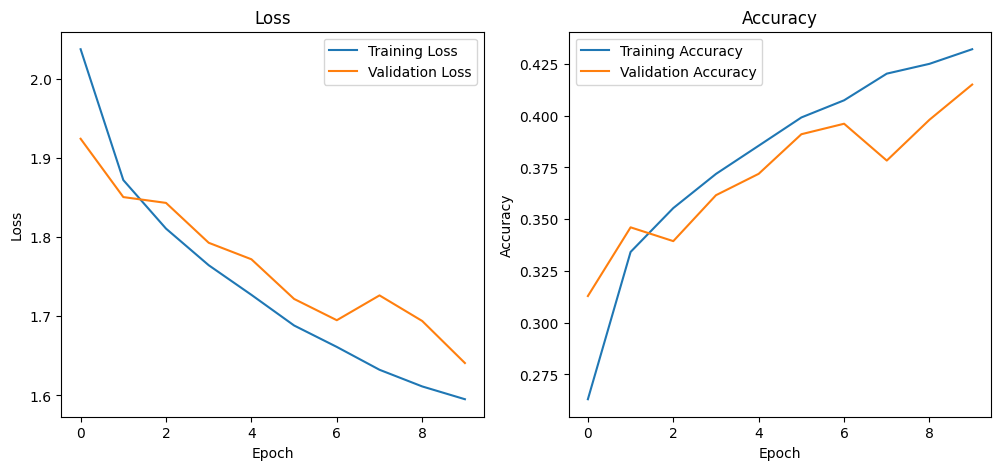

In [230]:
# Visualisation des courbes d'apprentissage
plt.figure(figsize=(12, 5))

# Courbes de perte
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Courbes d'exactitude
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### PYTORCH

In [294]:
originalImage = torch.tensor(np.array(originalImage)/255, dtype=torch.float32)
numerical_labels = torch.tensor(numerical_labels, dtype=torch.long).view(-1, 1)
# Diviser les données en ensembles d'entraînement et de validation
X_train_deep, X_val_deep, y_train_deep, y_val_deep = train_test_split(
    originalImage, numerical_labels, test_size=0.3, random_state=42
)

In [313]:
type(originalImage)

torch.Tensor

In [314]:
width = originalImage.size(1)
height = originalImage.size(2)
channel = originalImage.size(3)
input_size = width*height*channel
nbr_classes = len(labels)

In [315]:
train_dataset = TensorDataset(X_train_deep, y_train_deep)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataset = TensorDataset(X_val_deep, y_val_deep)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [316]:

class NNMODEL(nn.Module):
    def __init__(self):
        super(NNMODEL, self).__init__()
        self.hidden1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.hidden2 = nn.Linear(512, 128)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.view(-1, input_size)  # Flatten the input if needed
        x = self.hidden1(x)
        x = self.relu1(x)
        x = self.hidden2(x)
        x = self.relu2(x)
        x = self.output(x)
        x = self.softmax(x)
        return x


In [317]:
model= NNMODEL()
model

NNMODEL(
  (hidden1): Linear(in_features=3072, out_features=512, bias=True)
  (relu1): ReLU()
  (hidden2): Linear(in_features=512, out_features=128, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

In [318]:
for param in model.parameters():
  print(param.numel())

1572864
512
65536
128
1280
10


In [319]:

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


Complétons maintenant notre réseau en définissant une fonction de perte et un optimiseur. Tout d'abord, nous allons créer un critère et calculer la perte en utilisant la fonction nn.CrossEntropyLoss(). Nous appliquerons cette fonction particulière car il s'agit d'un problème de classification multi-classes.

Ensuite, nous allons créer un optimiseur de variables, et appeler la fonction torch.optim.SGD() qui calculera les dégradés. (SGD signifie Descente de Gradient Stochastique). Ensuite, nous passerons model.parameters() que nous souhaitons mettre à jour. De plus, nous fixerons le taux d'apprentissage à 0,01.

In [320]:
X_train_deep_tensor = torch.Tensor(X_train_deep)
y_train_deep_tensor = torch.LongTensor(y_train_deep)

X_val_deep_tensor = torch.Tensor(X_val_deep)
y_val_deep_tensor = torch.LongTensor(y_val_deep)

In [321]:
num_epochs = 10
batch_size = 64
val_lossList =[]
train_lossList =[]
val_accuracyList =[]
train_accuracyList =[]
for epoch in range(num_epochs):
    total_correct = 0
    total_samples = 0

    for i in range(0, len(X_train_deep_tensor), batch_size):
        # Forward pass
        outputs = model(X_train_deep_tensor[i:i+batch_size])
        targets = y_train_deep_tensor[i:i+batch_size].view(-1)

        loss = criterion(outputs, targets)

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == targets).sum().item()
        total_samples += targets.size(0)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    with torch.no_grad():
        val_outputs = model(X_val_deep_tensor)
        val_targets = y_val_deep_tensor.view(-1)

        val_loss = criterion(val_outputs, val_targets)

        # accuracy validation
        _, val_predicted = torch.max(val_outputs, 1)
        val_total_correct = (val_predicted == val_targets).sum().item()
        val_total_samples = val_targets.size(0)

    train_accuracy = total_correct / total_samples
    val_accuracy = val_total_correct / val_total_samples
    train_accuracyList.append(train_accuracy)
    val_accuracyList.append(val_accuracy)
    val_lossList.append(val_loss.item())
    train_lossList.append(loss.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Accuracy: {train_accuracy * 100:.2f}%, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy * 100:.2f}%')


Epoch 1/10, Loss: 2.177865743637085, Accuracy: 16.03%, Validation Loss: 2.2123525142669678, Validation Accuracy: 23.45%
Epoch 2/10, Loss: 2.150709867477417, Accuracy: 27.29%, Validation Loss: 2.168649435043335, Validation Accuracy: 28.29%
Epoch 3/10, Loss: 2.135338544845581, Accuracy: 30.87%, Validation Loss: 2.1307899951934814, Validation Accuracy: 32.45%
Epoch 4/10, Loss: 2.100167751312256, Accuracy: 33.64%, Validation Loss: 2.117358684539795, Validation Accuracy: 33.55%
Epoch 5/10, Loss: 2.0878539085388184, Accuracy: 35.19%, Validation Loss: 2.109215021133423, Validation Accuracy: 34.01%
Epoch 6/10, Loss: 2.0768637657165527, Accuracy: 36.72%, Validation Loss: 2.1003808975219727, Validation Accuracy: 35.07%
Epoch 7/10, Loss: 2.0560784339904785, Accuracy: 37.92%, Validation Loss: 2.085686445236206, Validation Accuracy: 36.66%
Epoch 8/10, Loss: 2.021960735321045, Accuracy: 39.10%, Validation Loss: 2.076835870742798, Validation Accuracy: 37.72%
Epoch 9/10, Loss: 1.995637059211731, Accur

Visualisation

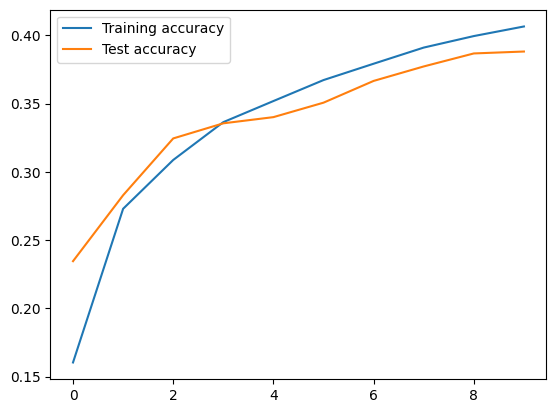

In [322]:
plt.plot(train_accuracyList, label= "Training accuracy")
plt.plot(val_accuracyList, label= "Test accuracy")
plt.legend()

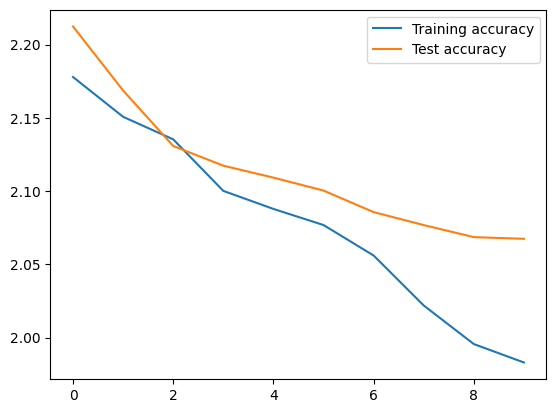

In [323]:
plt.plot(train_lossList, label= "Training accuracy")
plt.plot(val_lossList, label= "Test accuracy")
plt.legend()